In [1]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_users = pd.read_csv('../data/random-users.csv')

In [11]:
df_users.head()

,user_id,signup_date,lead_source,organization_type,organization_size,expected_student_count,role_title,primary_use_case,required_features,current_solution,decision_timeframe,converted,conversion_date
0,USR001,2024-03-15,Product Review Site,Individual Course Creator,51-200,100-500,Department Head,Compliance Training,"Course Creation, Certification Management, Mob...",Competitor Product,3-6 months,False,NaN
1,USR002,2024-01-08,Social Media,K-12 School,1000+,1000-5000,HR Manager,Compliance Training,"Assessment Tools, Course Creation, Virtual Cla...",Custom Built Solution,Within 1 month,False,NaN
2,USR003,2024-03-15,Direct Traffic,Corporate Training,1-50,5000+,HR Manager,Professional Certification,"Content Library, Compliance Training, Integrat...",Custom Built Solution,Within 1 month,False,NaN
3,USR004,2024-02-07,Education Conference,Certification Body,201-500,1000-5000,HR Manager,Employee Training,"Course Creation, Mobile Learning",Competitor Product,3-6 months,False,NaN
4,USR005,2024-03-14,Google Search,Corporate Training,201-500,<100,Training Manager,Academic Courses,"Integration Capabilities, Mobile Learning, Cer...",Custom Built Solution,6+ months,False,NaN


In [12]:
def analyze_conversion_metrics(df):
    # Overall conversion rate
    total_conversions = df['converted'].mean() * 100
    print(f"\nOverall Conversion Rate: {total_conversions:.1f}%")
    
    # Conversion rates by key dimensions
    dimensions = ['lead_source', 'organization_type', 'organization_size', 'decision_timeframe']
    
    for dim in dimensions:
        print(f"\nConversion Rate by {dim}:")
        conversion_by_dim = df.groupby(dim)['converted'].agg(['count', 'mean'])
        conversion_by_dim['conversion_rate'] = conversion_by_dim['mean'] * 100
        conversion_by_dim['total_users'] = conversion_by_dim['count']
        print(conversion_by_dim.sort_values('conversion_rate', ascending=False)[['total_users', 'conversion_rate']])

# Feature analysis
def analyze_feature_impact(df):
    # Extract features from the comma-separated list
    all_features = []
    for features in df['required_features'].str.split(','):
        all_features.extend([f.strip() for f in features])
    unique_features = list(set(all_features))
    
    # Calculate conversion rate for each feature
    feature_conversion = []
    for feature in unique_features:
        has_feature = df['required_features'].str.contains(feature)
        conv_rate = df[has_feature]['converted'].mean() * 100
        feature_conversion.append({
            'feature': feature,
            'conversion_rate': conv_rate,
            'total_users': has_feature.sum()
        })
    
    feature_df = pd.DataFrame(feature_conversion)
    print("\nConversion Rate by Required Feature:")
    print(feature_df.sort_values('conversion_rate', ascending=False))

# Timeline analysis
def analyze_conversion_timeline(df):
    # Convert dates to datetime
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['conversion_date'] = pd.to_datetime(df['conversion_date'])
    
    # Calculate time to conversion for converted users
    converted_users = df[df['converted']]
    converted_users['days_to_conversion'] = (converted_users['conversion_date'] - 
                                           converted_users['signup_date']).dt.days
    
    print("\nConversion Timeline Analysis:")
    print(f"Average days to conversion: {converted_users['days_to_conversion'].mean():.1f}")
    print(f"Median days to conversion: {converted_users['days_to_conversion'].median():.1f}")
    print(f"Min days to conversion: {converted_users['days_to_conversion'].min()}")
    print(f"Max days to conversion: {converted_users['days_to_conversion'].max()}")

# Segment analysis
def analyze_segments(df):
    # Create segments based on organization size and type
    print("\nSegment Analysis:")
    segment_conversion = df.groupby(['organization_size', 'organization_type'])['converted'].agg([
        'count',
        'mean'
    ]).reset_index()
    
    segment_conversion['conversion_rate'] = segment_conversion['mean'] * 100
    segment_conversion = segment_conversion[segment_conversion['count'] >= 3]  # Filter for segments with enough data
    
    print("\nTop Converting Segments:")
    print(segment_conversion.sort_values('conversion_rate', ascending=False).head(10))

# Visualization of key metrics
def plot_conversion_metrics(df):
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Conversion by Lead Source
    plt.subplot(2, 2, 1)
    conversion_by_source = df.groupby('lead_source')['converted'].mean().sort_values(ascending=True)
    conversion_by_source.plot(kind='barh')
    plt.title('Conversion Rate by Lead Source')
    plt.xlabel('Conversion Rate')
    
    # Plot 2: Conversion by Organization Size
    plt.subplot(2, 2, 2)
    conversion_by_size = df.groupby('organization_size')['converted'].mean().sort_values(ascending=True)
    conversion_by_size.plot(kind='barh')
    plt.title('Conversion Rate by Organization Size')
    plt.xlabel('Conversion Rate')
    
    # Plot 3: Conversion by Decision Timeframe
    plt.subplot(2, 2, 3)
    conversion_by_time = df.groupby('decision_timeframe')['converted'].mean().sort_values(ascending=True)
    conversion_by_time.plot(kind='barh')
    plt.title('Conversion Rate by Decision Timeframe')
    plt.xlabel('Conversion Rate')
    
    plt.tight_layout()
    plt.show()

def main(df):
    print("LearnSphere Demo Data Analysis")
    print("=" * 40)
    
    analyze_conversion_metrics(df)
    analyze_feature_impact(df)
    analyze_conversion_timeline(df)
    analyze_segments(df)
    plot_conversion_metrics(df)

LearnSphere Demo Data Analysis

Overall Conversion Rate: 22.0%

Conversion Rate by lead_source:
                      total_users  conversion_rate
lead_source                                       
Social Media                   16        43.750000
Product Review Site            18        33.333333
Direct Traffic                 15        26.666667
Google Search                  13        15.384615
Referral                       19        10.526316
Education Conference           19         5.263158

Conversion Rate by organization_type:
                                total_users  conversion_rate
organization_type                                           
Higher Education                         21        38.095238
K-12 School                              12        33.333333
Corporate Training                       26        19.230769
Individual Course Creator                11        18.181818
Certification Body                       13        15.384615
Professional Training Provider

/tmp/ipykernel_7399/2331611687.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_users['days_to_conversion'] = (converted_users['conversion_date'] -


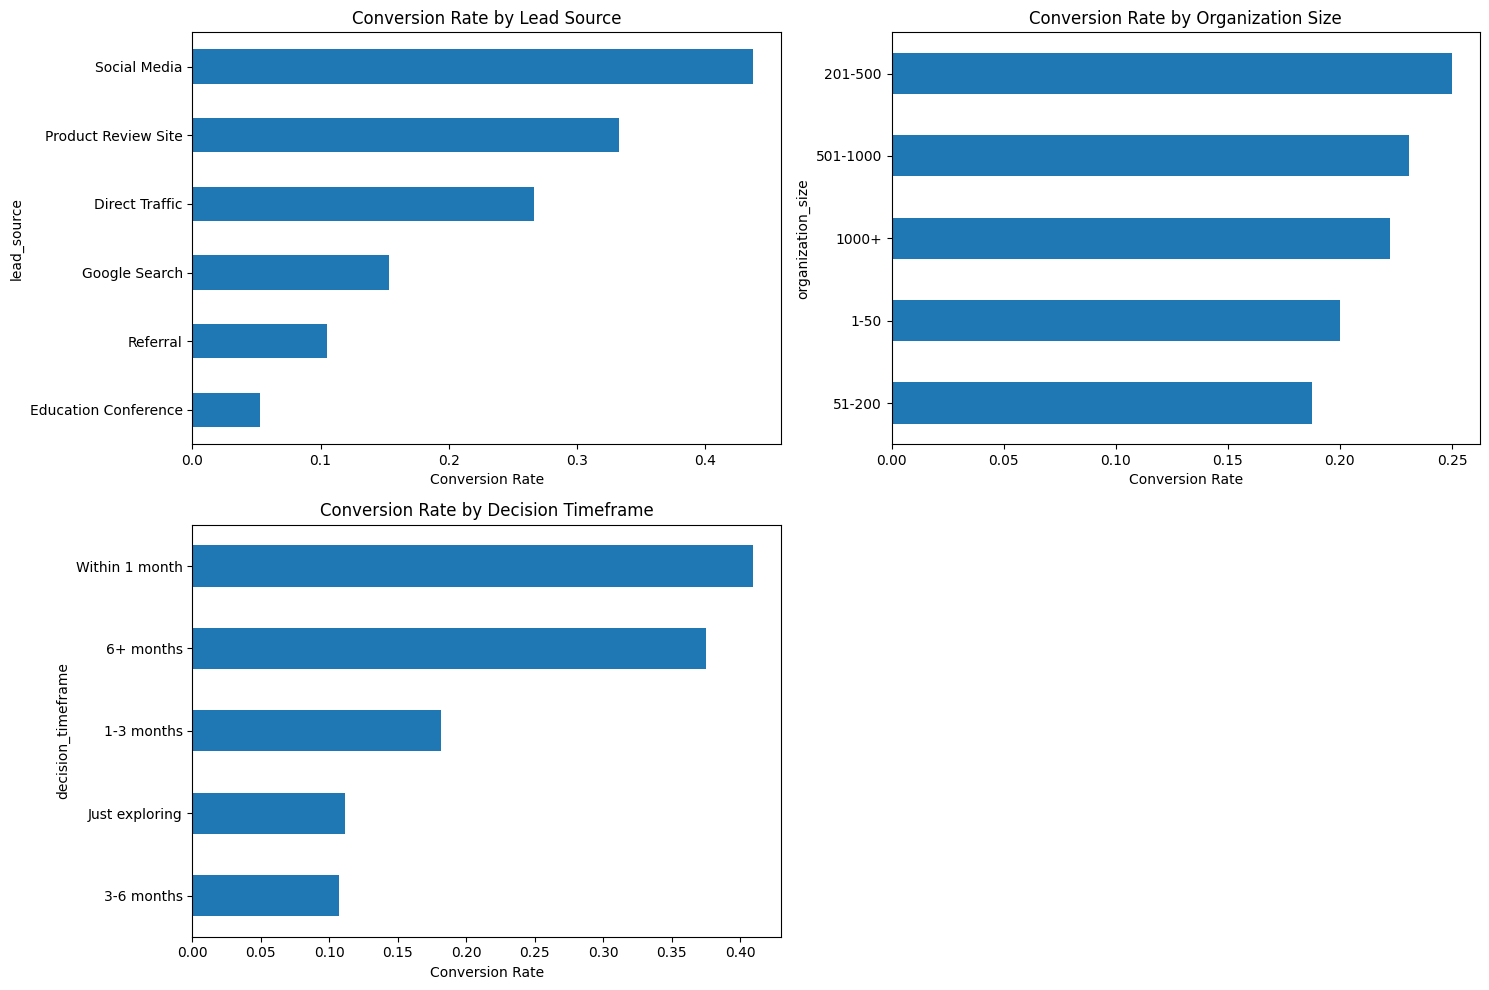

In [13]:
main(df_users)